EM 589: Practical Machine Learning for Enginnering Analytics (Spring 2025)  
Instructor: Fred Livingston (fjliving@ncsu.edu)

# Homework 002: Using Supervised Learning to Titanic shipwreck survivors

This is the legendary Titanic ML competition.
Use a machine learning to create a supervised learning classifier model that predicts which passengers survived the Titanic shipwreck.


## Prepare the Data for Machine Learning Algorithms

In [1]:
import pandas as pd
titanic_df = pd.read_csv('datasets/train.csv',index_col='PassengerId')

### Take a Quick Look at the Data Structure

In [2]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Task 1: Data Wrangling Cleaning [ 15pts ]

- Transform the input fearture 'Sex' from an object data type to int64 [ 5pts ]

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(titanic_df.Sex)
titanic_df.Sex = le.transform(titanic_df.Sex)
titanic_df.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

- Remove all other Features with the object data type [5pts]

In [12]:
# TODO: Drop columns

titanic_df = titanic_df.select_dtypes(exclude="object")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


- Notice that some Features contain NULL elements, Remove all NAN from data set [5pts]

In [16]:
# Drop rows with missing values
titanic_df.dropna(inplace=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


#### Your Final DataFrame should look something like the image below
<img src="images/x_trained_df.png" alt="drawing" width="400"/>

### Task 2: Using the Correlation Matrix, Determine the Top 5 paramaters in order of significance for predicting Survival [10 pts]

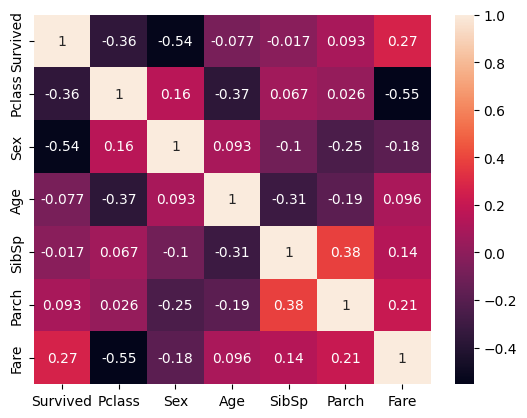

The top 5 features to predict survavival are: ['Sex', 'Pclass', 'Fare', 'Parch', 'Age']


In [32]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

cov_matrix = pd.DataFrame.corr(titanic_df)
sn.heatmap(cov_matrix, annot=True)
plt.show()

# To get the top 5 features, we will grab the largest magnitude covariance values
top_features = cov_matrix.Survived.drop(labels="Survived").abs().nlargest(5).index.tolist()
print(f"The top 5 features to predict survavival are: {top_features}")

### Task 3. Create a Test, and Validation Set
Using a three-way Holdout Method with a random seed of 123 and 20% test size percentage
creat a training, validation, and test set using the Top features from the feature correlation to predict output = "Survived"

<img src="images/holdout-tuning.png" alt="drawing" width="400"/>

In [18]:
y = titanic_df["Survived"]
X = titanic_df[["Sex", "Pclass", "Fare", "Parch", "Age", "SibSp"]]


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

### Task 5: Using Logistic Regression, KNN, Stochastic Gradient Descent, determine models training and validation, accuracy and optimized hyperparams to best predict Survival Rate [ 60 pts ]


#### Logistic Regression Model
- Model Implementation [5 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# TODO: Create a Logistic Regression model
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline()

#### KNeighborsClassifier Model
n_neighbors = [ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
- Model Implementation [5 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]
- Optimal N_neighbors [5pts]
- Describe the relationship between training and validation accuracy [5pts]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_models = []
acc_knn = []
n_neighbors = [ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# TODO: Create a KNN model


### Stochastic Gradient Descent
- Model Implementation [10 pts]
- Training Accuracy [5pts]
- Validation Accuracy [5pts]

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# TODO: Create a Stochastic Gradient Descent model


### Task 6: Choose the best Model and evaulate its performance on the test data set [ 15 pts ]
- Best Model [5 pts]
- Test Accuracy [5 pts]
- How does the Test accuracy differ from the validation accuracy? [5 pts]

In [ ]:
# TODO: Fit the models